In [24]:
import sys
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import thicket as th
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [25]:
tk = th.Thicket.from_caliperreader(glob("RandomSpeedup/*.cali"))

(2/2) Creating Thicket: 100%|██████████| 8/8 [00:00<00:00, 536.80it/s]
/home/ado/.local/lib/python3.10/site-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


In [80]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:profile.mpi,spot:region.count,spot:time.exclusive,spot:time.variance,launchdate,libraries,cmdline,cluster,algorithm,programming_model,data_type,size_of_data_type,input_size,input_type,num_procs,group_num,implementation_source,scalability
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,
34514284,2.11.0,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p128-a4194304.cali,true,true,true,true,1729438431,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 4194304, bitonic, random]",c,bitonic,mpi,int,4,4194304,random,128,8,online,weak
51158898,2.11.0,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p16-a4194304.cali,true,true,true,true,1729438431,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 4194304, bitonic, random]",c,bitonic,mpi,int,4,4194304,random,16,8,online,weak
210478988,2.11.0,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p2-a4194304.cali,true,true,true,true,1729438431,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 4194304, bitonic, random]",c,bitonic,mpi,int,4,4194304,random,2,8,online,weak
389822904,2.11.0,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p8-a4194304-sbitonic-i1perturbed.cali,true,true,true,true,1729560208,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 4194304, bitonic, 1perturbed]",c,bitonic,mpi,int,4,4194304,1perturbed,8,8,online,weak
1161105437,2.11.0,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p4-a4194304-sbitonic-i1perturbed.cali,true,true,true,true,1729560209,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 4194304, bitonic, 1perturbed]",c,bitonic,mpi,int,4,4194304,1perturbed,4,8,online,weak
1656300721,2.11.0,256,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p256-a4194304.cali,true,true,true,true,1729438447,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 4194304, bitonic, random]",c,bitonic,mpi,int,4,4194304,random,256,8,online,weak
1876752849,2.11.0,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p8-a4194304.cali,true,true,true,true,1729438430,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 4194304, bitonic, random]",c,bitonic,mpi,int,4,4194304,random,8,8,online,weak
2019302383,2.11.0,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p64-a4194304-sbitonic-i1perturbed.cali,true,true,true,true,1729561066,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 4194304, bitonic, 1perturbed]",c,bitonic,mpi,int,4,4194304,1perturbed,64,8,online,weak
2405902553,2.11.0,512,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p512-a4194304.cali,true,true,true,true,1729438447,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 4194304, bitonic, random]",c,bitonic,mpi,int,4,4194304,random,512,8,online,weak


In [3]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

0.319 main
├─ 0.001 MPI_Comm_dup
├─ 0.003 MPI_Comm_split
├─ 0.000 MPI_Finalize
├─ 0.000 MPI_Finalized
├─ 0.000 MPI_Init
├─ 0.000 MPI_Initialized
├─ 0.002 comm
│  ├─ 0.002 comm_large
│  │  ├─ 0.000 MPI_Gather
│  │  ├─ 0.001 MPI_Scatter
│  │  └─ 0.001 MPI_Sendrecv
│  └─ 0.000 comm_small
│     ├─ 0.000 MPI_Barrier
│     └─ 0.000 MPI_Bcast
├─ 0.013 comp
│  └─ 0.013 comp_large
├─ 0.001 correctness_check
└─ 0.001 data_init_runtime
   └─ 0.000 MPI_Gather

Legend (Metric: Avg time/rank Min: 0.00 Max: 0.32 indices: {'profile': np.int64(1494377952)})
█ 0.29 - 0.32
█ 0.22 - 0.29
█ 0.16 - 0.22
█ 0.10 - 0.16
█ 0.03 - 0.10
█ 0.00 - 0.03

name User code    ◀  Only in left graph    ▶  Only in right graph



In [26]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_type")
tk.metadata_column_to_perfdata("input_size")
tk.dataframe = tk.dataframe.reset_index()
tk.dataframe.head()

,node,profile,nid,spot.channel,Min time/rank,Max time/rank,Avg time/rank,Total time,Variance time/rank,Min time/rank (exc),Max time/rank (exc),Avg time/rank (exc),Total time (exc),Calls/rank (min),Calls/rank (avg),Calls/rank (max),Calls/rank (total),name,num_procs,input_type,input_size
0,"{'name': 'main', 'type': 'function'}",606438922,1.0,regionprofile,29.262373,29.269282,29.266739,936.535649,0.000005,2.086227,2.150199,2.100865,67.227673,NaN,NaN,NaN,NaN,main,32,random,268435456
1,"{'name': 'main', 'type': 'function'}",994303680,1.0,regionprofile,11.776083,11.803677,11.788432,6035.677255,0.000034,1.798725,1.982523,1.882087,963.628592,NaN,NaN,NaN,NaN,main,512,random,268435456
2,"{'name': 'main', 'type': 'function'}",1349775678,1.0,regionprofile,13.698451,13.728375,13.712121,3510.302848,0.000061,1.804261,2.885961,2.332441,597.104817,NaN,NaN,NaN,NaN,main,256,random,268435456
3,"{'name': 'main', 'type': 'function'}",2059378701,1.0,regionprofile,100.034797,100.034797,100.034797,200.069594,0.000000,1.061429,1.065465,1.063447,2.126894,NaN,NaN,NaN,NaN,main,2,random,268435456
4,"{'name': 'main', 'type': 'function'}",3113080574,1.0,regionprofile,16.905409,16.913577,16.909684,1082.219792,0.000009,1.700204,1.748641,1.724749,110.383966,NaN,NaN,NaN,NaN,main,64,random,268435456


In [37]:
def plot_pandas(df, title, xlabel, ylabel):
    plot = df.plot(kind="line",
    marker='o',
    title=title,
    xlabel=xlabel,
    ylabel=ylabel,
    figsize=(15,7)
    )
    return plot

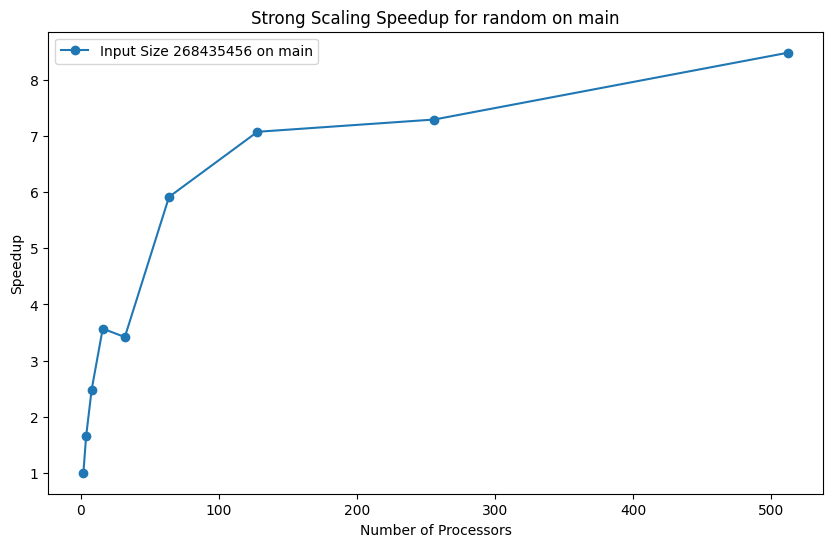

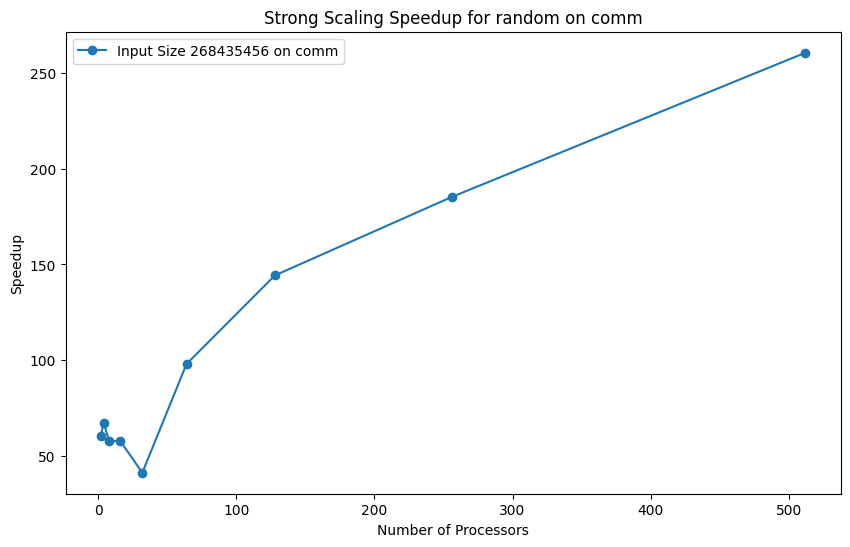

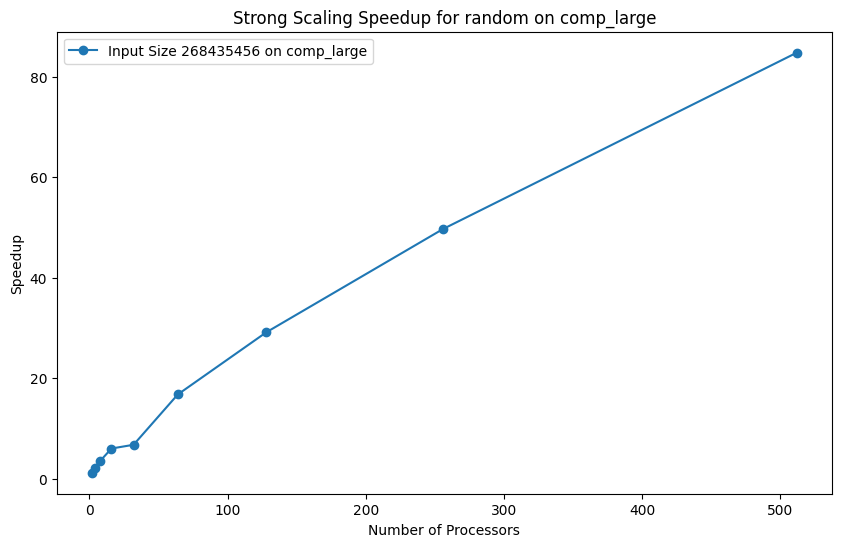

In [29]:
input_sizes = [268435456] # Largest problem size
input_types = ["random"]

# Function to create strong scaling speedup plots
def plot_speedup(tk, input_types):
    for node in tk.graph.traverse():
        node_name = node.frame['name']
        if (node_name == 'comp_large') or (node_name == 'comm') or (node_name == 'main'):
            for input_type in input_types:
                fig, ax = plt.subplots(figsize=(10, 6))
                baseline_time = tk.dataframe[(tk.dataframe["num_procs"] == 2) & (tk.dataframe["input_type"] == input_type)]["Avg time/rank"].values[0]
                for input_size in input_sizes:
                    data = tk.dataframe[(tk.dataframe["input_type"] == input_type) & (tk.dataframe["input_size"] == input_size) & (tk.dataframe['node'] == node)]
                    data = data.sort_values(by="num_procs")
                    speedup = baseline_time / data["Avg time/rank"]
                    ax.plot(data["num_procs"], speedup, marker='o', label=f'Input Size {input_size} on {node_name}')
                ax.set_title(f'Strong Scaling Speedup for {input_type} on {node_name}')
                ax.set_xlabel('Number of Processors')
                ax.set_ylabel('Speedup')
                ax.legend()
                plt.show()

plot_speedup(tk, input_types)

In [92]:
tk.dataframe = tk.dataframe.reset_index()#.set_index(["node"])
tk.dataframe

,node,num_procs,profile,nid,spot.channel,Min time/rank,Max time/rank,Avg time/rank,Total time,Variance time/rank,Min time/rank (exc),Max time/rank (exc),Avg time/rank (exc),Total time (exc),Calls/rank (min),Calls/rank (avg),Calls/rank (max),Calls/rank (total),name,input_type,input_size
0,"{'name': 'main', 'type': 'function'}",128,34514284,1.0,regionprofile,2.162364,2.185724,2.174416,278.325248,0.000101,1.890610,1.925751,1.911400,244.659139,NaN,NaN,NaN,NaN,main,random,4194304
1,"{'name': 'main', 'type': 'function'}",16,51158898,1.0,regionprofile,2.402589,2.402741,2.402685,38.442963,0.000000,1.958913,1.959291,1.959066,31.345059,NaN,NaN,NaN,NaN,main,random,4194304
2,"{'name': 'main', 'type': 'function'}",2,210478988,1.0,regionprofile,2.432996,2.433015,2.433006,4.866011,0.000000,1.131202,1.132303,1.131753,2.263505,NaN,NaN,NaN,NaN,main,random,4194304
3,"{'name': 'main', 'type': 'function'}",8,389822904,1.0,regionprofile,1.233312,1.234984,1.234233,9.873867,0.000001,0.499257,0.501330,0.500364,4.002911,NaN,NaN,NaN,NaN,main,1perturbed,4194304
4,"{'name': 'main', 'type': 'function'}",4,1161105437,1.0,regionprofile,1.514166,1.514255,1.514207,6.056828,0.000000,0.368166,0.374936,0.373074,1.492295,NaN,NaN,NaN,NaN,main,1perturbed,4194304
5,"{'name': 'main', 'type': 'function'}",256,1656300721,1.0,regionprofile,2.053408,2.322270,2.280886,583.906900,0.007409,1.816951,2.124346,2.037715,521.654961,NaN,NaN,NaN,NaN,main,random,4194304
6,"{'name': 'main', 'type': 'function'}",8,1876752849,1.0,regionprofile,2.139028,2.143197,2.142628,17.141022,0.000002,1.581236,1.585922,1.584843,12.678741,NaN,NaN,NaN,NaN,main,random,4194304
7,"{'name': 'main', 'type': 'function'}",64,2019302383,1.0,regionprofile,1.995686,2.037916,2.017470,129.118092,0.000292,1.528815,1.565156,1.542224,98.702343,NaN,NaN,NaN,NaN,main,1perturbed,4194304
8,"{'name': 'main', 'type': 'function'}",512,2405902553,1.0,regionprofile,2.211498,2.301872,2.264290,1159.316730,0.000827,1.864771,2.094367,1.982914,1015.251961,NaN,NaN,NaN,NaN,main,random,4194304
9,"{'name': 'main', 'type': 'function'}",2,2466704898,1.0,regionprofile,2.233422,2.233807,2.233614,4.467229,0.000000,0.318014,0.321672,0.319843,0.639686,NaN,NaN,NaN,NaN,main,1perturbed,4194304
